In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [2]:
# downloading the data from yahoo finance
data = yf.download('AAPL', '2010-1-1')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487532,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425994,447610800


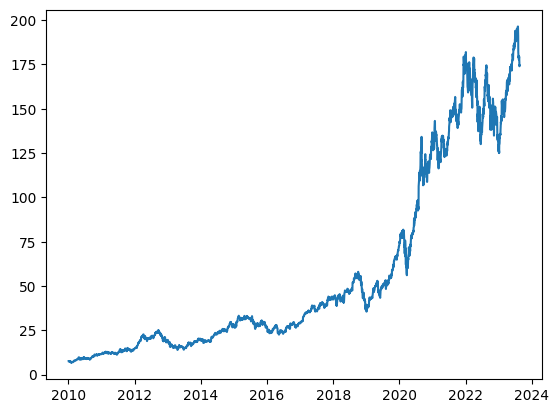

In [4]:
plt.plot(data.Close)

In [5]:
# converting index

data = data.reset_index()

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487532,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425994,447610800


In [7]:
# Classifying into training and testing data

training = pd.DataFrame(data['Close'][0 : int(len(data.Close)*0.7)])
testing = pd.DataFrame(data['Close'][int(len(data.Close)*0.7) : len(data.Close)])
training.tail()
testing.head()

,Close
2401,50.647499
2402,51.805000
2403,52.209999
2404,52.167500
2405,51.755001


In [8]:
# Scaling down the data to a range of (0,1)

scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
# below method will convert the data into array

train_array = scaler.fit_transform(training)
train_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.86527181],
       [0.85965206],
       [0.87094048]])

In [10]:
train_array.shape

(2401, 1)

In [11]:
# Defining X_train and y_train

X_train = []
y_train = []

for i in range(100, train_array.shape[0]):
    X_train.append(train_array[i-100 : i])
    y_train.append(train_array[i,0])

#  converting the list to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

LSTM MODEL

In [12]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [13]:
X_train.shape

(2301, 100, 1)

In [14]:
# Making Layers

model = Sequential()

model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=265, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [15]:
# compiling our model and data fitting
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
72/72 [==============================] - 33s 395ms/step - loss: 0.0550
Epoch 2/50
72/72 [==============================] - 26s 355ms/step - loss: 0.0050
Epoch 3/50
72/72 [==============================] - 28s 383ms/step - loss: 0.0043
Epoch 4/50
72/72 [==============================] - 25s 347ms/step - loss: 0.0037
Epoch 5/50
72/72 [==============================] - 24s 334ms/step - loss: 0.0037
Epoch 6/50
72/72 [==============================] - 24s 338ms/step - loss: 0.0042
Epoch 7/50
72/72 [==============================] - 24s 338ms/step - loss: 0.0033
Epoch 8/50
72/72 [==============================] - 24s 335ms/step - loss: 0.0032
Epoch 9/50
72/72 [==============================] - 25s 344ms/step - loss: 0.0032
Epoch 10/50
72/72 [==============================] - 25s 341ms/step - loss: 0.0032
Epoch 11/50
72/72 [==============================] - 24s 335ms/step - loss: 0.0030
Epoch 12/50
72/72 [==============================] - 25s 351ms/step - loss: 0.0029
Epoch 13/50
7

In [16]:
# svaing our model
model.save('second_model.h5')

c:\D Drive\My Projects\Stock Prediction 2\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# to predict the 1st 100 values of testing data we need the last 100 values of training data
# we will concatenate them

past_100_days = training.tail(100)
final_df = pd.concat([past_100_days, testing], ignore_index=True)

In [18]:
# scaling down final_df

input_data = scaler.fit_transform(final_df)

In [19]:
input_data

array([[0.00298386],
       [0.00386433],
       [0.00105983],
       ...,
       [0.87034084],
       [0.85357902],
       [0.85677488]])

In [20]:
# classifying input_data into X_test and y_test

X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100 : i])
    y_test.append(input_data[i,0])

#  converting the list to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(1029, 100, 1)
(1029,)


In [21]:
y_pred = model.predict(X_test)
y_pred
y_pred.shape

33/33 [==============================] - 4s 98ms/step


(1029, 1)

In [22]:
scaler.scale_

array([0.00652209])

In [23]:
# upscaling the data again to normal form
scale_fac = 1/0.00963066
y_pred = y_pred*scale_fac
y_test = y_test*scale_fac

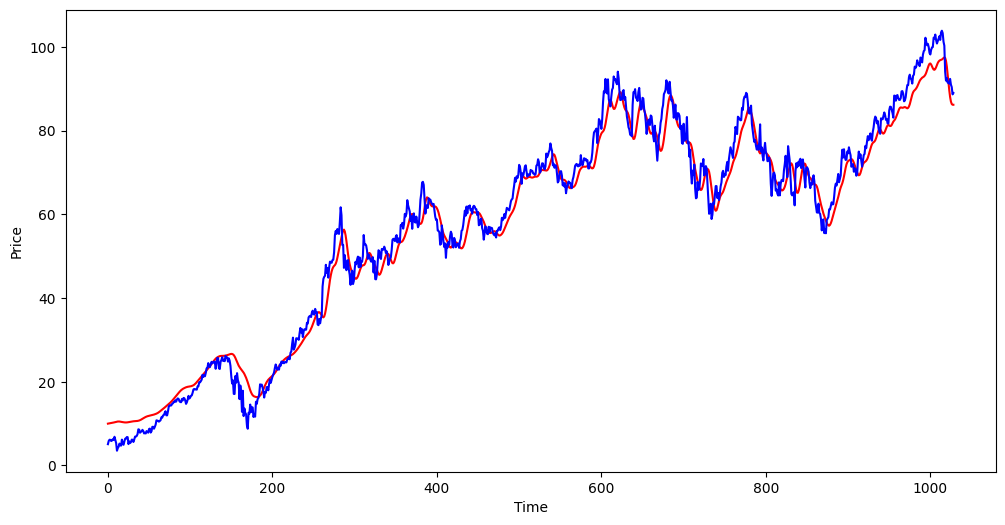

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.plot(y_test, 'b', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [25]:
print(y_pred.shape)
print(y_test.shape)
print(y_test)
print(y_pred)

(1029, 1)
(1029,)
[ 5.09440101  5.87828617  6.15256021 ... 90.37187944 88.63141424
 88.96325668]
[[ 9.99494 ]
 [10.030276]
 [10.063811]
 ...
 [86.34302 ]
 [86.15533 ]
 [86.15061 ]]


In [26]:

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(mse)
    print(rmse)
    print(r2)

In [27]:
calculate_metrics(y_test, y_pred)

14.416252095330263
3.7968739899199004
0.979129042553467
